<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial114_can_autoencoders_be_used_for_semantic_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can autoencoders be used or semantic segmentation?

https://youtu.be/sGQi7QGKwCQ

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


Read image and corresponding mask

In [ ]:
SIZE=512

Read the image

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/sandstone/image.tif', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(512, 512, 3)


In [ ]:
#Get image shape ready for the network
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 512, 512, 3)


Read the mask

In [ ]:
mask=cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/sandstone/mask_color.tif', 1)   #Change 1 to 0 for grey images

mask=cv2.resize(mask,(SIZE, SIZE))
print(mask.shape)


(512, 512, 3)


In [ ]:
#mask_array = np.expand_dims(mask, axis=2) #Grayscale image, so let us expand dim to indicate we have 1 channel
mask_array = np.expand_dims(mask, axis=0) #Expand dim along axis 0 to get it to the right shape for the network
print(mask_array.shape)

(1, 512, 512, 3)


In [ ]:
img_array = img_array.astype('float32') / 255.  #Scale image pixel values to between 0 and 1
mask_array = mask_array.astype('float32') / 255.  #Mask has values 0, 255 - scale them to 0 and 1.


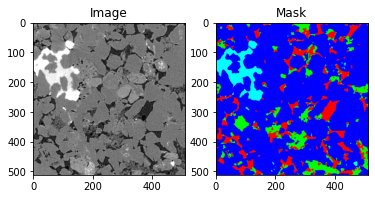

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_array[0,:,:,0], cmap='gray')
plt.title('Image')
plt.subplot(1,2,2)
plt.imshow(mask_array[0,:,:,:])
plt.title('Mask')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  #Using binary cross entropy loss. Try other losses. 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 256)     295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       5

In [ ]:
model.fit(img_array, mask_array, epochs=500) #If the model does not converge try a few times....


Epoch 1/500
1/1 [==============================] - 33s 33s/step - loss: 0.6891 - accuracy: 0.3181
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 0.5224 - accuracy: 0.7604
Epoch 3/500
1/1 [==============================] - 0s 40ms/step - loss: 0.5101 - accuracy: 0.7604
Epoch 4/500
1/1 [==============================] - 0s 42ms/step - loss: 0.4096 - accuracy: 0.7604
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 0.4388 - accuracy: 0.7604
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 0.4411 - accuracy: 0.7604
Epoch 7/500
1/1 [==============================] - 0s 42ms/step - loss: 0.4137 - accuracy: 0.7604
Epoch 8/500
1/1 [==============================] - 0s 40ms/step - loss: 0.4142 - accuracy: 0.7604
Epoch 9/500
1/1 [==============================] - 0s 38ms/step - loss: 0.4289 - accuracy: 0.7604
Epoch 10/500
1/1 [==============================] - 0s 39ms/step - loss: 0.4115 - accuracy: 0.7604
Epoch 11/500
1/1 [=

In [ ]:
pred = model.predict(img_array)



In [ ]:
print(pred.shape)
print(pred.max())

(1, 512, 512, 3)
1.0


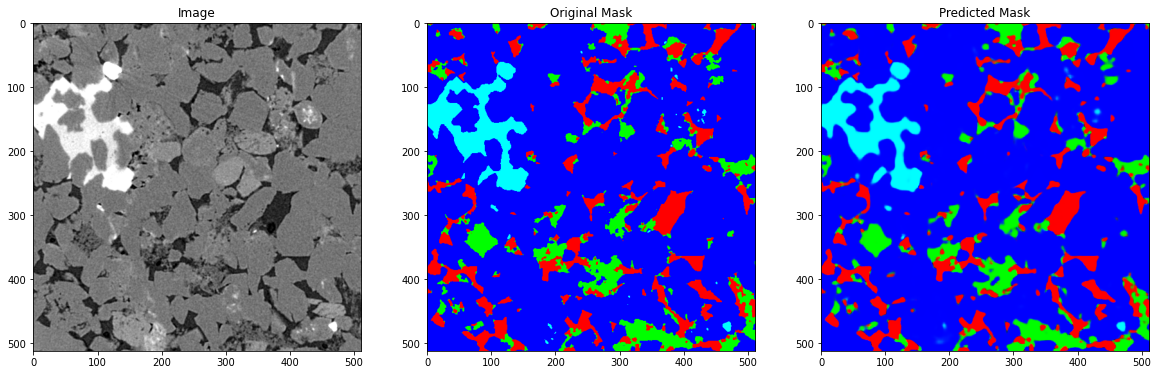

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('Original Mask')
plt.subplot(1,3,3)
plt.imshow(pred[0,:,:,:])
plt.title('Predicted Mask')
plt.show()

Results look great but they are a bit fuzzy (soft around edges making them rounded) as we lose resolution of feature maps as we go from initial encoder layers towards the end and then through deocder. To improve the information defining finer details we need to leverage the features from earlier encoder layers. <br>
<p>
What if we can attach features from encoders (with rich spatial information) to the features from decoder (with rich feature information)? This can be achieved by concatenating encoder features with their equivalent decoders. 
<p>
**This architecture is referred to as U-Net.**

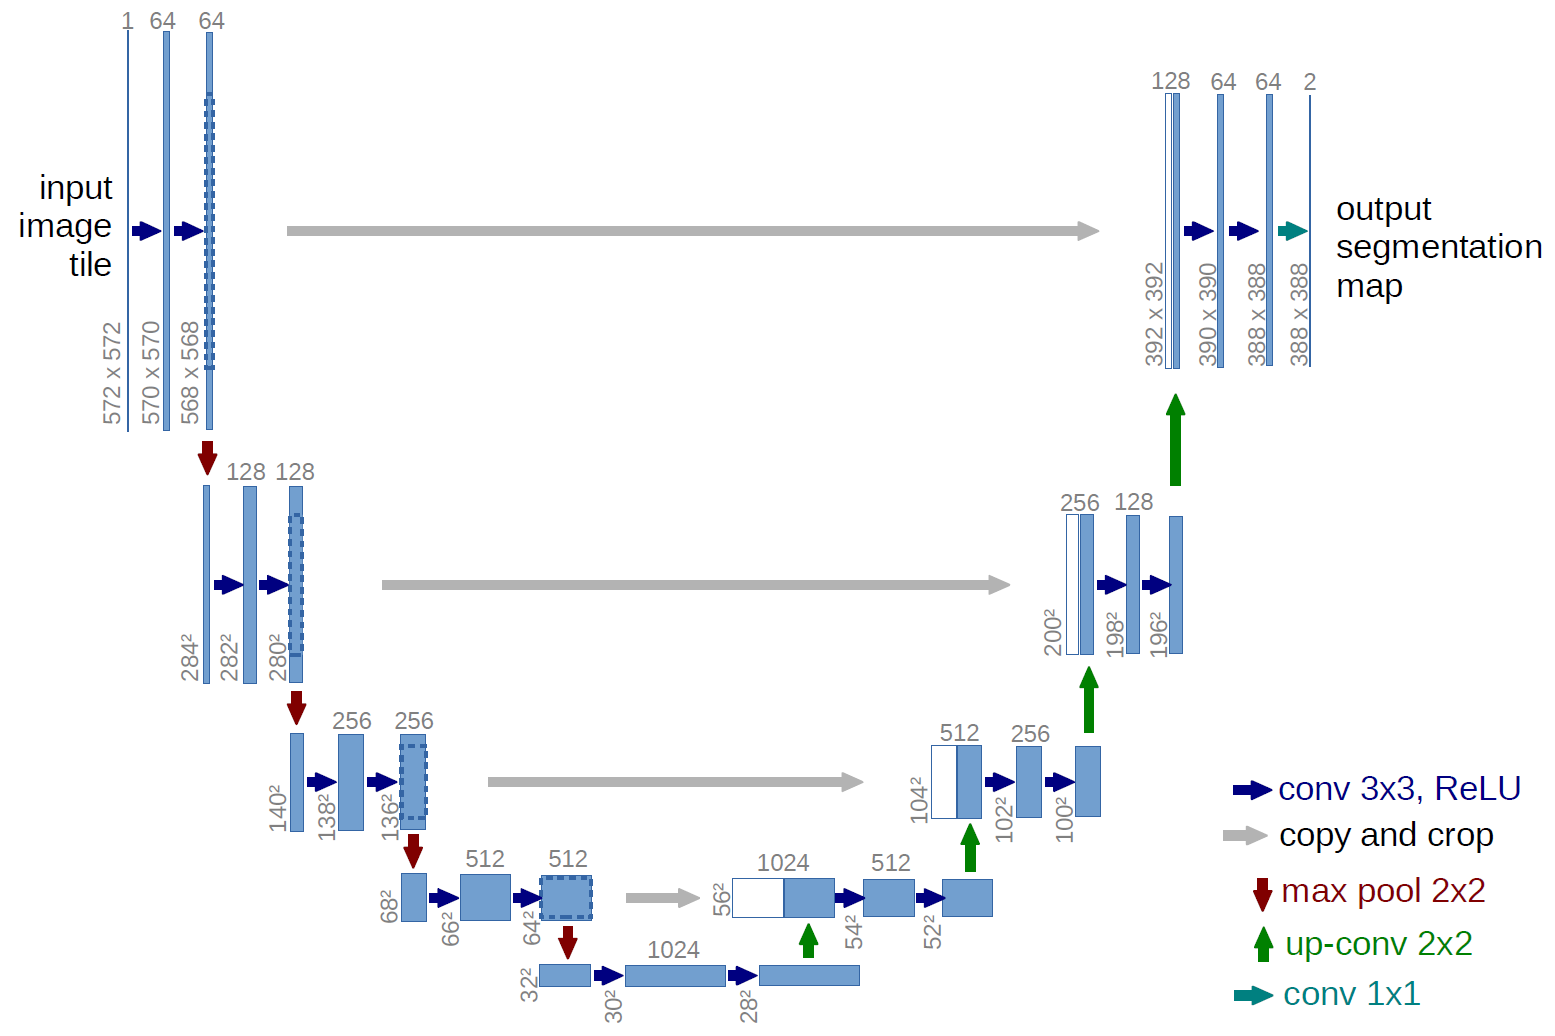